<a href="https://colab.research.google.com/github/aditipriya25/Movie_rate_prediction/blob/main/Movie_rate_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages (if needed)
!pip install pandas scikit-learn seaborn matplotlib --quiet


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
# Load dataset (upload CSV from Kaggle or manually upload to Colab)
from google.colab import files
uploaded = files.upload()


Saving IMDb Movies India.csv to IMDb Movies India.csv


In [5]:
df = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin-1')  # Specifying the encoding as 'latin-1'
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


<ipython-input-22-a497ea793421>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(df['Year'].median(), inplace=True)
<ipython-input-22-a497ea793421>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


📊 Mean Squared Error: 0.71
📈 R-squared Score: 0.62


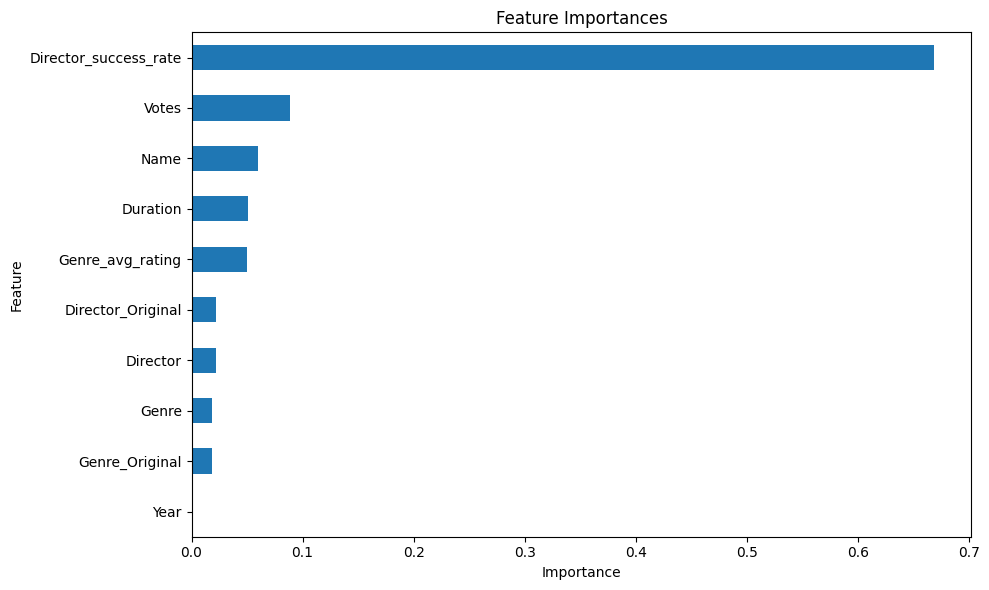

In [22]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# 3. Drop missing Rating rows
df = df.dropna(subset=['Rating'])

# 4. Handle missing and bad data
df['Genre'] = df['Genre'].fillna('Unknown')
df['Director'] = df['Director'].fillna('Unknown')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Year'].fillna(df['Year'].median(), inplace=True)

# Clean 'Votes' column
if 'Votes' in df.columns:
    df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
    df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
    df['Votes'].fillna(0, inplace=True)

# Encode categorical variables
label_encoders = {}
for col in ['Genre', 'Director']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 5. Feature Engineering
director_avg_rating = df.groupby('Director')['Rating'].mean()
df['Director_success_rate'] = df['Director'].map(director_avg_rating)

genre_avg_rating = df.groupby('Genre')['Rating'].mean()
df['Genre_avg_rating'] = df['Genre'].map(genre_avg_rating)

# 6. Prepare features
# Drop all non-numeric columns automatically
X = df.drop(columns=['Rating'])
X = X.select_dtypes(include=[np.number])  # keep only numeric columns
y = df['Rating']

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 9. Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Mean Squared Error: {mse:.2f}")
print(f"📈 R-squared Score: {r2:.2f}")

# 10. Feature Importance Plot
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title="Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error

# Regression evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\n📊 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📏 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📈 R-squared Score: {r2:.2f}")



📊 Mean Squared Error (MSE): 0.71
📉 Root Mean Squared Error (RMSE): 0.84
📏 Mean Absolute Error (MAE): 0.59
📈 R-squared Score: 0.62


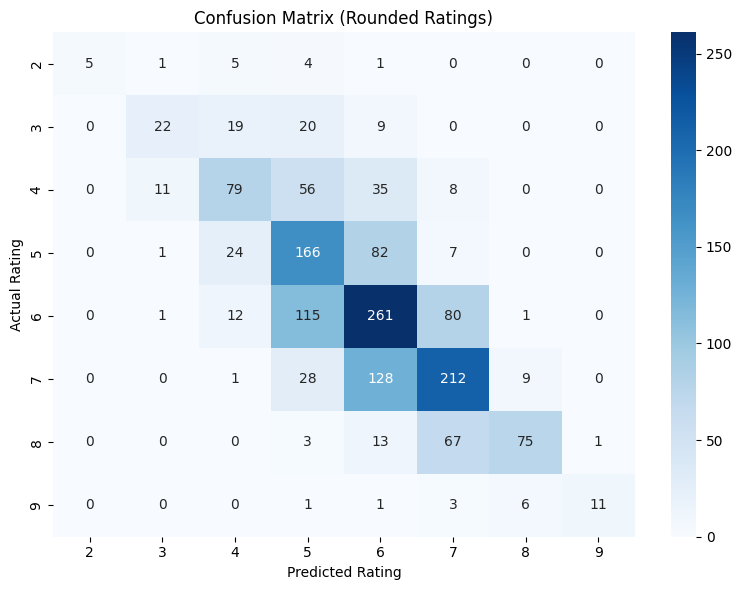

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Convert continuous ratings into class bins (e.g., rounded to nearest int)
y_test_class = y_test.round().astype(int)
y_pred_class = pd.Series(y_pred).round().astype(int)

# Confusion matrix
cm = confusion_matrix(y_test_class, y_pred_class, labels=sorted(y_test_class.unique()))

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test_class.unique()),
            yticklabels=sorted(y_test_class.unique()))
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.title("Confusion Matrix (Rounded Ratings)")
plt.tight_layout()
plt.show()
